In [ ]:
from google.colab import files
uploaded = files.upload()

Saving E-com.data.csv to E-com.data.csv


In [ ]:
import pandas as pd

# Load the uploaded CSV file

df = pd.read_csv("E-com.data.csv")

# View basic info

print(df.shape)
print(df.columns)
df.head()


(10000, 17)
Index(['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date',
       'Product_Category', 'Product_Price', 'Order_Quantity', 'Return_Reason',
       'Return_Status', 'Days_to_Return', 'User_Age', 'User_Gender',
       'User_Location', 'Payment_Method', 'Shipping_Method',
       'Discount_Applied'],
      dtype='object')


,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied
0,ORD00000000,PROD00000000,USER00000000,05-08-2023,26-08-2024,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27
1,ORD00000001,PROD00000001,USER00000001,09-10-2023,09-11-2023,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79
2,ORD00000002,PROD00000002,USER00000002,06-05-2023,NaN,Toys,390.03,5,NaN,Not Returned,NaN,22,Female,City30,Debit Card,Next-Day,26.64
3,ORD00000003,PROD00000003,USER00000003,29-08-2024,NaN,Toys,401.09,3,NaN,Not Returned,NaN,40,Male,City95,PayPal,Next-Day,15.37
4,ORD00000004,PROD00000004,USER00000004,16-01-2023,NaN,Books,110.09,4,NaN,Not Returned,NaN,34,Female,City80,Gift Card,Standard,16.37


In [ ]:
# Data Cleaning

#1. Convert to datetime

df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce', dayfirst=True)
df['Return_Date'] = pd.to_datetime(df['Return_Date'], errors='coerce', dayfirst=True)

# 2. Create binary target column
df['Is_Returned'] = df['Return_Status'].apply(lambda x: 1 if x == 'Returned' else 0)

# 3. Fill missing values
df['Return_Reason'] = df['Return_Reason'].fillna('Not Returned')
df['Days_to_Return'] = df['Days_to_Return'].fillna(-1)


# 4. Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_')


# 5. Remove duplicates
df.drop_duplicates(inplace=True)

# 6. Confirm cleaning
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          10000 non-null  object        
 1   Product_ID        10000 non-null  object        
 2   User_ID           10000 non-null  object        
 3   Order_Date        10000 non-null  datetime64[ns]
 4   Return_Date       5052 non-null   datetime64[ns]
 5   Product_Category  10000 non-null  object        
 6   Product_Price     10000 non-null  float64       
 7   Order_Quantity    10000 non-null  int64         
 8   Return_Reason     10000 non-null  object        
 9   Return_Status     10000 non-null  object        
 10  Days_to_Return    10000 non-null  float64       
 11  User_Age          10000 non-null  int64         
 12  User_Gender       10000 non-null  object        
 13  User_Location     10000 non-null  object        
 14  Payment_Method    10000

,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Category,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,User_Age,User_Gender,User_Location,Payment_Method,Shipping_Method,Discount_Applied,Is_Returned
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,Clothing,411.59,3,Changed mind,Returned,387.0,58,Male,City54,Debit Card,Next-Day,45.27,1
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,Books,288.88,3,Wrong item,Returned,31.0,68,Female,City85,Credit Card,Express,47.79,1
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaT,Toys,390.03,5,Not Returned,Not Returned,-1.0,22,Female,City30,Debit Card,Next-Day,26.64,0
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaT,Toys,401.09,3,Not Returned,Not Returned,-1.0,40,Male,City95,PayPal,Next-Day,15.37,0
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaT,Books,110.09,4,Not Returned,Not Returned,-1.0,34,Female,City80,Gift Card,Standard,16.37,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

<ipython-input-7-7a1ad88df6fd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_return.index, y=category_return.values, palette='viridis')


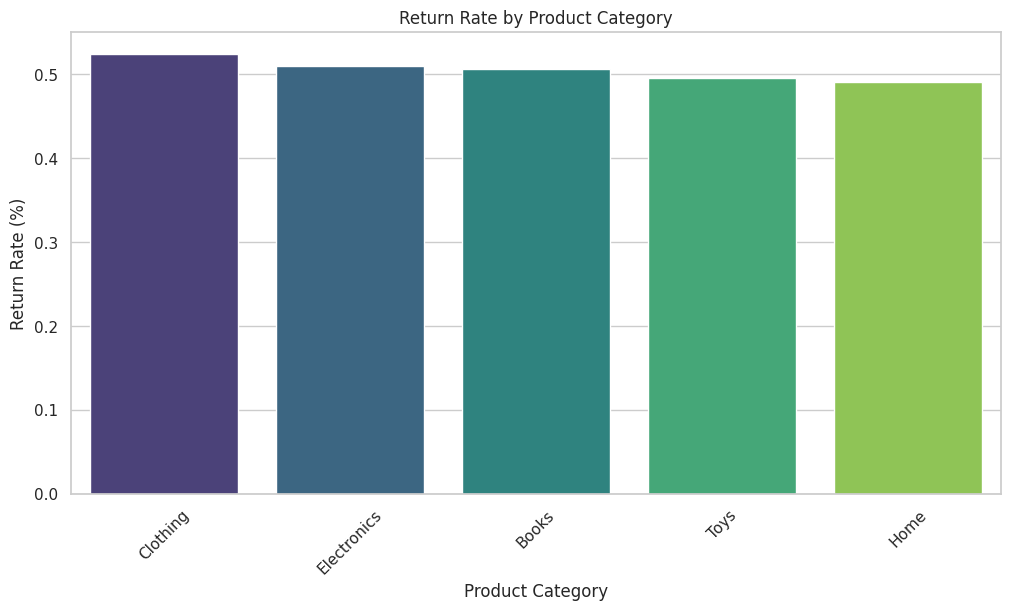

In [ ]:
# Return Rate by Product Category

# Group by product category
category_return = df.groupby('Product_Category')['Is_Returned'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=category_return.index, y=category_return.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Return Rate by Product Category')
plt.ylabel('Return Rate (%)')
plt.xlabel('Product Category')
plt.show()

<ipython-input-8-8e4ae3951979>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='User_Gender', y='Is_Returned', palette='pastel')


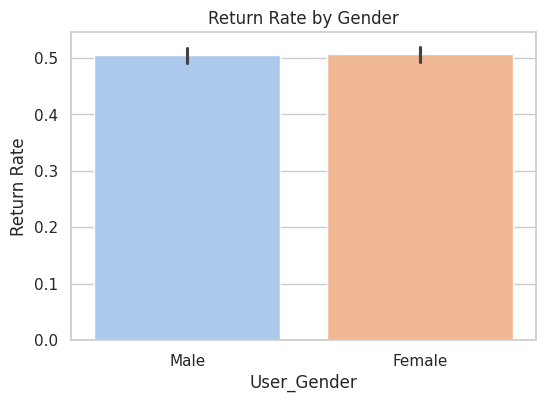

In [ ]:
# Return Rate by User Gender

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='User_Gender', y='Is_Returned', palette='pastel')
plt.title('Return Rate by Gender')
plt.ylabel('Return Rate')
plt.show()

<ipython-input-9-29d685194169>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Age_Group', y='Is_Returned', palette='coolwarm')


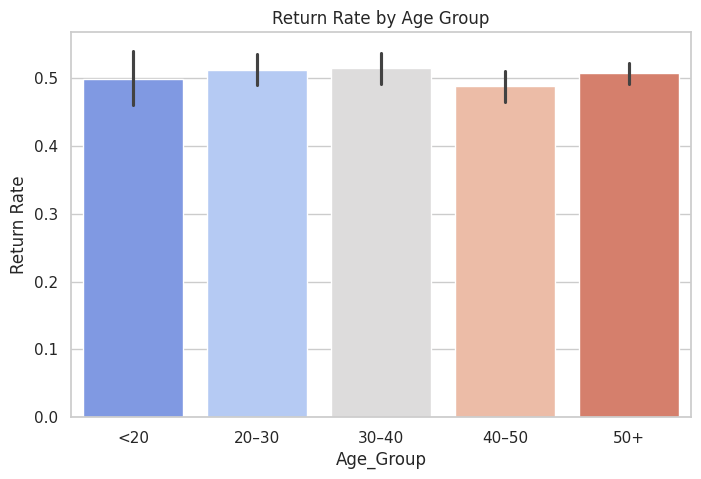

In [ ]:
# Return Rate by Age Group

# Create age bins
bins = [0, 20, 30, 40, 50, 100]
labels = ['<20', '20–30', '30–40', '40–50', '50+']
df['Age_Group'] = pd.cut(df['User_Age'], bins=bins, labels=labels)

# Plot return rate by age group
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Age_Group', y='Is_Returned', palette='coolwarm')
plt.title('Return Rate by Age Group')
plt.ylabel('Return Rate')
plt.show()


<ipython-input-13-36f76f9b369f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_geo, x='User_Location', y='Is_Returned', estimator='mean', palette='mako')


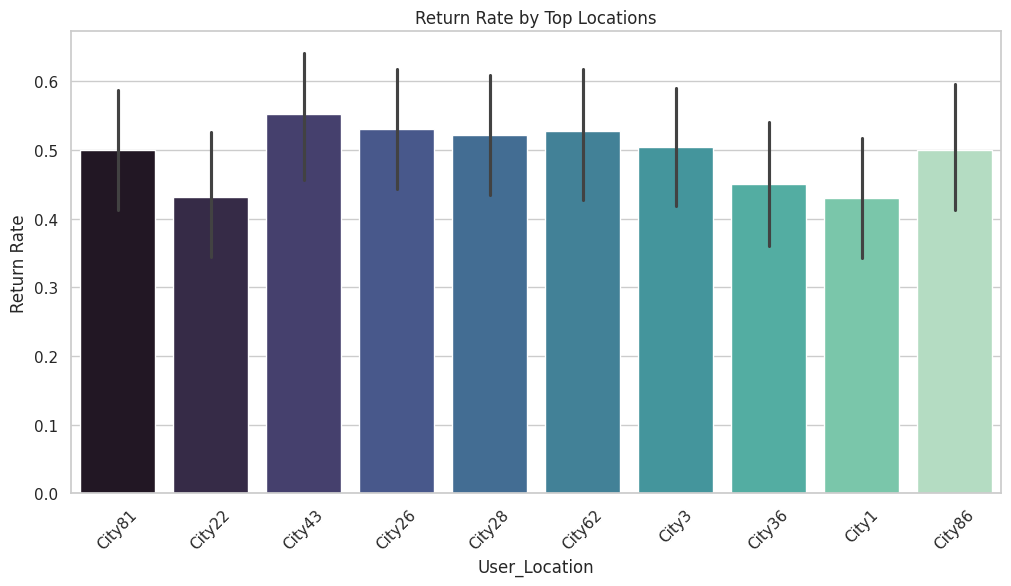

In [ ]:
# Return Rate by Geography (User_Location)

top_locations = df['User_Location'].value_counts().nlargest(10).index
top_geo = df[df['User_Location'].isin(top_locations)]

plt.figure(figsize=(12,6))
sns.barplot(data=top_geo, x='User_Location', y='Is_Returned', estimator='mean', palette='mako')
plt.title('Return Rate by Top Locations')
plt.ylabel('Return Rate')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Drop rows with missing key values
df_model = df.dropna(subset=[
    'User_Age', 'User_Gender', 'Product_Category', 'User_Location',
    'Product_Price', 'Order_Quantity', 'Discount_Applied'
])

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df_model, columns=[
    'User_Gender', 'Product_Category', 'User_Location'
], drop_first=True)

# Save the encoded dataset
df_encoded.to_csv("Ecom_Encoded_Ready.csv", index=False)

from google.colab import files
files.download("Ecom_Encoded_Ready.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving Ecom_Encoded.csv to Ecom_Encoded.csv


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#  Load the encoded dataset
df = pd.read_csv("Ecom_Encoded.csv")

In [ ]:
# View column names and first few rows
print(df.columns)
df.head()

Index(['Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date',
       'Product_Price', 'Order_Quantity', 'Return_Reason', 'Return_Status',
       'Days_to_Return',
       ...
       'User_Location_City90', 'User_Location_City91', 'User_Location_City92',
       'User_Location_City93', 'User_Location_City94', 'User_Location_City95',
       'User_Location_City96', 'User_Location_City97', 'User_Location_City98',
       'User_Location_City99'],
      dtype='object', length=120)


,Order_ID,Product_ID,User_ID,Order_Date,Return_Date,Product_Price,Order_Quantity,Return_Reason,Return_Status,Days_to_Return,...,User_Location_City90,User_Location_City91,User_Location_City92,User_Location_City93,User_Location_City94,User_Location_City95,User_Location_City96,User_Location_City97,User_Location_City98,User_Location_City99
0,ORD00000000,PROD00000000,USER00000000,2023-08-05,2024-08-26,411.59,3,Changed mind,Returned,387.0,...,False,False,False,False,False,False,False,False,False,False
1,ORD00000001,PROD00000001,USER00000001,2023-10-09,2023-11-09,288.88,3,Wrong item,Returned,31.0,...,False,False,False,False,False,False,False,False,False,False
2,ORD00000002,PROD00000002,USER00000002,2023-05-06,NaN,390.03,5,Not Returned,Not Returned,-1.0,...,False,False,False,False,False,False,False,False,False,False
3,ORD00000003,PROD00000003,USER00000003,2024-08-29,NaN,401.09,3,Not Returned,Not Returned,-1.0,...,False,False,False,False,False,True,False,False,False,False
4,ORD00000004,PROD00000004,USER00000004,2023-01-16,NaN,110.09,4,Not Returned,Not Returned,-1.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the data
df = pd.read_csv('Ecom_Encoded.csv')



In [ ]:
# Separate target before encoding
y = df['Return_Status']

#  Drop unnecessary columns (IDs, dates, free text)
df_features = df.drop(columns=['Return_Status', 'Order_ID', 'Product_ID', 'User_ID', 'Order_Date', 'Return_Date', 'Return_Reason'])


In [ ]:
#  One-hot encode categorical columns
X = pd.get_dummies(df_features, drop_first=True)

# test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[1009    0]
 [   0  991]]
Classification Report:
               precision    recall  f1-score   support

Not Returned       1.00      1.00      1.00      1009
    Returned       1.00      1.00      1.00       991

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [ ]:
# Predict return probabilities
df['Return_Probability'] = model.predict_proba(X)[:, 1]

# Export high-risk products
high_risk = df[df['Return_Probability'] > 0.7]
high_risk.to_csv('high_risk_products.csv', index=False)
print("Exported high-risk products to high_risk_products.csv")



Exported high-risk products to high_risk_products.csv
